<a href="https://colab.research.google.com/github/NikitaMarnykh/labor_market_analysis/blob/main/%D0%9C%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%9D_%D0%92_%D0%B8_%D0%9E%D0%B1%D0%BE%D1%80%D0%BE%D1%82%D0%BE%D0%B2_%D0%9C_%D0%92_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D1%8B%D0%BD%D0%BA%D0%B0_%D1%82%D1%80%D1%83%D0%B4%D0%B0_advanced_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Постановка задачи и описание датасета

Перед Департаментом труда и занятости населения Томской области стоит задача
– в течение полугода разработать эффективные стратегии управления
персоналом, образования и подготовки кадров в целях увеличения уровня
занятости в регионе на 2 процентных пункта. Для этого специалистам необходимо
лучше понять особенности функционирования рынка труда, а именно: в какие
города области и какие специалисты требуются, какими ключевыми навыками они
должны обладать, какие условия труда предлагают работодатели, есть ли
возможность трудоустроиться соискателям с инвалидностью.
Специалистами Роснавыка были представлены датасеты с выгруженной
информацией по региону.

**Задачи:**

  - Проанализируйте ключевые навыки в самой популярной сфере/сферах в регионе и выявить значимые взаимосвязи между признаками (на какие навыки и в каких городах наибольший спрос, есть ли взаимосвязь между навыками и требованиями к соискателям, как тот или иной навык влияет на условия труда) (датасет hh_hard.csv)

  - построить регрессионную модель для предсказания уровня заработной платы.

  - Представьте аналитический отчет содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения его бизнес-задач.

**Исходные данные:**

  - идентификатор вакансии (id)

  - наименование вакансии (name)

  - профессиональная роль (professional roles)

  - регион (area), в т.ч. страна (country), регион (region), округ (district), город(city)

  - заработная плата (salary), в т.ч. минимальная заработная плата (salary_from),
максимальная заработная плата (salary_to)

  - опыт работы (experience): 0 – без опыта, 1-3 – от 1 до 3 лет, 3-6 – от 3 до 6 лет, 6- - от 6 лет

  - график работы (schedule): full_day – полный день, remote – удаленная работа,
  flexible – гибкий график, shift – сменный график, labor - вахтовый метод

  - тип занятости (employment): full – полная занятость, part – частичная
занятость, project – проектная работа, probation - стажировка

  - наименование работодателя (employer)

  - доступна ли вакансия для соискателей с инвалидностью (accept_handicapped): True – доступна, False - недоступна

  - ключевые навыки (key_skills)

**Датасет в формате csv по ссылке:**

  - https://disk.yandex.ru/d/OYP_n5bYz_ExzA


## 2. Установка и подключение зависимостей

Устанавливаем все необходимые зависимости

In [386]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scipy
!pip install seaborn
!pip install statsmodels
!pip install scikit-learn
!pip install re
!pip install json
!pip install ast
!pip missingno

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
  Using cached AST-0.0.2.tar.gz (19 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: unknown command "missingno"


Подключаем все необходимые зависимости

In [387]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

import re

import json

import ast

import missingno as msno

from sklearn.impute import KNNImputer

Подгружаем репозиторий для работы с ним

In [388]:
!git clone https://github.com/NikitaMarnykh/labor_market_analysis

Cloning into 'labor_market_analysis'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 5), reused 10 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 1.41 MiB | 5.33 MiB/s, done.
Resolving deltas: 100% (5/5), done.


Перейдём в установленный репозиторий

In [389]:
%cd labor_market_analysis/

/content/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis


## 3. Первичный обзор датасета. Оценка размеров датасета, наличия дубликатов и пропусков

Сохраняем датасет в переменную

In [390]:
dataset = pd.read_csv('hh_hard.csv',
                      na_values=['NA', 'N/A', 'null', 'missing', '-', '?', '...'],
                      keep_default_na=True,
                      na_filter=True)

Проведём обзор содержимого таблицы

In [391]:
dataset.head(15)

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}"
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}"
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}"
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}"
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}"
5,72124633,Дефектоскопист,Технолог,1-3,full_day,full,Деталь Проект,False,"['Ведение документооборота', 'Базовые знания П...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":60000.0}"
6,72124864,Водитель-кладовщик,Водитель,0,full_day,full,Автоцентр АВТОГИК,False,"['Базовые знания ПК', 'Коммуникативная грамотн...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":35000.0,""salary_to"":85000.0}"
7,72125286,Электромонтер,Электромонтажник,3-6,labor,full,Эко-Системы,False,"['Монтаж металлоконструкций', 'Выполнение стро...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":100000.0,""salary_to"":150000.0}"
8,72125786,Менеджер по продажам,"Менеджер по продажам, менеджер по работе с кли...",1-3,full_day,full,"Мототека, филиал г.Томск",False,"['Продажи', 'Коммуникативная грамотность', 'Гр...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":95000.0}"
9,72125979,Менеджер по продажам,Агент по недвижимости,0,full_day,full,ДомПлюс,False,"['Продажи', 'Продажи', 'Коммуникативная грамот...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":80000.0,""salary_to"":null}"


Просмотрим информацию о датасете

In [392]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20178 entries, 0 to 20177
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20178 non-null  int64 
 1   name                20178 non-null  object
 2   professional_roles  20178 non-null  object
 3   experience          20178 non-null  object
 4   schedule            20178 non-null  object
 5   employment          20178 non-null  object
 6   employer            20178 non-null  object
 7   accept_handicapped  20178 non-null  bool  
 8   key_skills          20178 non-null  object
 9   area                20178 non-null  object
 10  salary              20178 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 1.6+ MB


Информация, содержащаяся в датасете:
  
  - идентификатор вакансии (id)

  - наименование вакансии (name)

  - профессиональная роль (professional roles)

  - регион (area), в т.ч. страна (country), регион (region), округ (district), город(city)

  - заработная плата (salary), в т.ч. минимальная заработная плат (salary_from), максимальная заработная плата (salary_to)

  - опыт работы (experience)

  - график работы (schedule)

  - тип занятости (employment)

  - наименование работодателя (employer)

  - доступна ли вакансия для соискателей с инвалидностью (accept_handicapped)
  
  - ключевые навыки (key_skills)

Оценим размеры датасета

In [393]:
dataset.shape

(20178, 11)

Оценим наличие полных дубликатов в датасете

In [394]:
dataset.duplicated(keep=False).sum()

np.int64(356)

Оценим наличие пропущенных значений в датасете

In [395]:
dataset.isnull().sum()

,0
id,0
name,0
professional_roles,0
experience,0
schedule,0
employment,0
employer,0
accept_handicapped,0
key_skills,0
area,0


Выводы по предварительному осмотру:

* **О размерах датасета**:

  20178 строк (наблюдений), 11 столбцов (признаков)

* **О типах данных**:

  - Количественные признаки:

    * идентификатор вакансии (id)

    * заработная плата (salary)

  - Категориальные признаки:

    * наименование вакансии (name)

    * профессиональная роль (professional roles)

    * регион (area)

    * опыт работы (experience)

    * график работы (schedule)

    * тип занятости (employment)

    * наименование работодателя (employer)

    * доступна ли вакансия для соискателей с инвалидностью (accept_handicapped)

    * ключевые навыки (key_skills)


* **О дубликатах**:

  - Присутствуют полные дубликаты


* **О пропущенных значениях:**

  - Пропущенных значений нет ни в одном из признаков

  - Возможно на этапе обработки признаков появятся нулевые значения там, где их быть не должно

## 4. Предобработка данных

Посмотрим на полные дубликаты

In [396]:
dataset[dataset.duplicated(keep=False)].sort_values(['professional_roles'])

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary
20121,55287186,SMM специалист,"SMM-менеджер, контент-менеджер",1-3,full_day,full,Smart World (Умный мир),False,"['Знание основ в области маркетинга', 'Продвиж...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":null}"
3644,55287186,SMM специалист,"SMM-менеджер, контент-менеджер",1-3,full_day,full,Smart World (Умный мир),False,"['Знание основ в области маркетинга', 'Продвиж...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":null}"
20175,83414938,Ученик автослесаря,"Автослесарь, автомеханик",0,shift,probation,Атом Авто Томск,False,"['Знание технических характеристик, конструкци...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":null}"
12907,83414938,Ученик автослесаря,"Автослесарь, автомеханик",0,shift,probation,Атом Авто Томск,False,"['Знание технических характеристик, конструкци...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":null}"
20085,66564937,Агент по недвижимости,Агент по недвижимости,1-3,flexible,full,Агентство недвижимости Успех,False,"['Работа с жилой недвижимостью', 'Работа с жил...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":50000.0,""salary_to"":300000.0}"
...,...,...,...,...,...,...,...,...,...,...,...
16317,91850385,Юрисконсульт 1 категории,Юрисконсульт,3-6,full_day,full,Газпром трансгаз Томск,False,"['Коммуникативная грамотность', 'Составление д...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":null}"
1718,83514395,Консультант отдела контроля застройки и землеп...,Юрист,0,full_day,full,Администрация Ленинского района Города Томска,False,"['Ответственность', 'Самоорганизованность', 'М...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":32000.0,""salary_to"":34000.0}"
20048,83514395,Консультант отдела контроля застройки и землеп...,Юрист,0,full_day,full,Администрация Ленинского района Города Томска,False,"['Ответственность', 'Самоорганизованность', 'М...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":32000.0,""salary_to"":34000.0}"
20042,92102447,Судебный юрист,Юрист,3-6,full_day,full,Юридическая фирма ЛЛ.Си-Право,False,"['Знание общих нормативно-правовых актов РФ', ...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":null}"


Удалим полные дубликаты

In [397]:
dataset.drop_duplicates(inplace=True)

Заново проиндексируем датасет

In [398]:
dataset.reset_index(drop=True, inplace=True)

Проверим индексацию

In [399]:
dataset.index

RangeIndex(start=0, stop=20000, step=1)

### 4.1 Обработка признака id

Запишем имя признака в переменную sign

In [400]:
sign = 'id'

Выведем признак для просмотра содержимого

In [401]:
dataset[sign].head(20)

,id
0,72121675
1,72121730
2,72122239
3,72123219
4,72123390
5,72124633
6,72124864
7,72125286
8,72125786
9,72125979


Выведем уникальные значения

In [402]:
pd.Series(dataset[sign].unique()).sample(20)

,0
828,68024098
8373,89843097
15073,94738361
7405,92110108
15002,69700706
8000,97631257
18093,69607783
2299,55530369
15772,78697582
4534,55485161


Посмотрим наличие дубликатов

In [403]:
dataset.duplicated(subset=sign).sum()

np.int64(0)

**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака не изменился

### 4.2 Обработка признака name

Запишем имя признака в переменную sign

In [404]:
sign = 'name'

Выведем признак для просмотра содержимого

In [405]:
dataset[sign].head(30)

,name
0,"Инженер-конструктор (в г. Электрогорск, Москов..."
1,Специалист по доставке (Подработка)
2,Удаленный оператор ПК / сотрудник на ввод данных
3,Повар линии раздачи
4,Повар в магазин SPAR (ул.Киевская 139)
5,Дефектоскопист
6,Водитель-кладовщик
7,Электромонтер
8,Менеджер по продажам
9,Менеджер по продажам


Выведем уникальные значения

In [406]:
pd.Series(dataset[sign].unique()).sample(20)

,0
10038,Руководитель медицинского центра (Абакан)
2623,Проектировщик по разделу газоснабжение
490,Заместитель главного бухгалтера
3169,Инженер автоматизированных систем управления и...
243,Менеджер офиса
52,Администратор в стоматологию
5177,Врач по медицинской реабилитации
7217,React Frontend разработчик Middle
4881,Менеджер по продажам IT-продукта
9432,Преподаватель BIG DATA (Data Engineer/Python d...


Посмотрим наличие дубликатов

In [407]:
dataset.duplicated(subset=sign).sum()

np.int64(9793)

Приведём признак к типу string

In [408]:
dataset[sign] = dataset[sign].astype('string')

Проверим тип данных

In [409]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20000 non-null  int64 
 1   name                20000 non-null  string
 2   professional_roles  20000 non-null  object
 3   experience          20000 non-null  object
 4   schedule            20000 non-null  object
 5   employment          20000 non-null  object
 6   employer            20000 non-null  object
 7   accept_handicapped  20000 non-null  bool  
 8   key_skills          20000 non-null  object
 9   area                20000 non-null  object
 10  salary              20000 non-null  object
dtypes: bool(1), int64(1), object(8), string(1)
memory usage: 1.5+ MB


**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака приведён к string

### 4.3 Обработка признака professional_roles

In [410]:
sign = 'professional_roles'

Выведем признак для просмотра содержимого

In [411]:
dataset[sign].head(30)

,professional_roles
0,"Инженер-конструктор, инженер-проектировщик"
1,Курьер
2,"Менеджер по продажам, менеджер по работе с кли..."
3,"Официант, бармен, бариста"
4,"Повар, пекарь, кондитер"
5,Технолог
6,Водитель
7,Электромонтажник
8,"Менеджер по продажам, менеджер по работе с кли..."
9,Агент по недвижимости


Выведем уникальные значения

In [412]:
pd.Series(dataset[sign].unique()).sample(20)

,0
34,Администратор
3,"Официант, бармен, бариста"
21,Другое
52,"Администратор магазина, администратор торговог..."
77,Руководитель группы разработки
106,Оператор станков с ЧПУ
75,Геодезист
143,Методолог
112,Мастер-приемщик
141,"BI-аналитик, аналитик данных"


Посмотрим количество уникальных значений

In [413]:
dataset[sign].unique().shape

(171,)

Посмотрим наличие дубликатов

In [414]:
dataset.duplicated(subset=sign).sum()

np.int64(19829)

Приведём признак к типу string

In [415]:
dataset[sign] = dataset[sign].astype('string')

Проверим тип данных

In [416]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20000 non-null  int64 
 1   name                20000 non-null  string
 2   professional_roles  20000 non-null  string
 3   experience          20000 non-null  object
 4   schedule            20000 non-null  object
 5   employment          20000 non-null  object
 6   employer            20000 non-null  object
 7   accept_handicapped  20000 non-null  bool  
 8   key_skills          20000 non-null  object
 9   area                20000 non-null  object
 10  salary              20000 non-null  object
dtypes: bool(1), int64(1), object(7), string(2)
memory usage: 1.5+ MB


**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака приведён к string

### 4.4 Обработка признака experience

Запишем имя признака в переменную sign

In [417]:
sign = 'experience'

Выведем признак для просмотра содержимого

In [418]:
dataset[sign].head(30)

,experience
0,1-3
1,0
2,0
3,0
4,0
5,1-3
6,0
7,3-6
8,1-3
9,0


Выведем уникальные значения

In [419]:
dataset[sign].unique()

array(['1-3', '0', '3-6', '6-'], dtype=object)

One-hot кодировка

In [420]:
pd.get_dummies(dataset[sign], prefix=sign, dtype=int)

,experience_0,experience_1-3,experience_3-6,experience_6-
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
19995,1,0,0,0
19996,1,0,0,0
19997,1,0,0,0
19998,0,0,1,0


Присоединим бинарные признаки к датасету

In [421]:
dataset = pd.concat([dataset, pd.get_dummies(dataset[sign], prefix=sign, dtype=int)], axis=1)
dataset

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary,experience_0,experience_1-3,experience_3-6,experience_6-
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",0,1,0,0
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}",1,0,0,0
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}",1,0,0,0
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}",1,0,0,0
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",0,full_day,full,Нужные Люди,False,"['Коммуникативная грамотность', 'Консультирова...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":27000.0,""salary_to"":30000.0}",1,0,0,0
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0
19997,69663286,Курьер САМОКАТ,Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,3-6,labor,full,Нефтегазовые технологии и инженерные изыскания,False,"['Многозадачность', 'Стрессоустойчивость', 'Ст...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":120000.0,""salary_to"":135000.0}",0,0,1,0


Переименуем столбцы

In [422]:
dataset.rename(columns={'experience_0': 'experience_0',
                        'experience_1-3': 'experience_from_1_to_3',
                        'experience_3-6': 'experience_from_3_to_6',
                        'experience_6-': 'experience_6_or_more'
                        }, inplace=True)

dataset[['experience_0',	'experience_from_1_to_3',	'experience_from_3_to_6', 'experience_6_or_more']]

,experience_0,experience_from_1_to_3,experience_from_3_to_6,experience_6_or_more
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
19995,1,0,0,0
19996,1,0,0,0
19997,1,0,0,0
19998,0,0,1,0


Приведём все столбцы к типу 'category'

In [423]:
dataset[['experience_0',	'experience_from_1_to_3',	'experience_from_3_to_6', 'experience_6_or_more']] = dataset[['experience_0',	'experience_from_1_to_3',	'experience_from_3_to_6', 'experience_6_or_more']].astype('category')

Удалим из датасета обработанный признак

In [424]:
dataset.drop(columns=sign, inplace=True)

Осмотрим датасет

In [425]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      20000 non-null  int64   
 1   name                    20000 non-null  string  
 2   professional_roles      20000 non-null  string  
 3   schedule                20000 non-null  object  
 4   employment              20000 non-null  object  
 5   employer                20000 non-null  object  
 6   accept_handicapped      20000 non-null  bool    
 7   key_skills              20000 non-null  object  
 8   area                    20000 non-null  object  
 9   salary                  20000 non-null  object  
 10  experience_0            20000 non-null  category
 11  experience_from_1_to_3  20000 non-null  category
 12  experience_from_3_to_6  20000 non-null  category
 13  experience_6_or_more    20000 non-null  category
dtypes: bool(1), category(4

**Выводы по обработке признака**:

  * Аномалии не были найдены

  * После обработки признака выросло количество признаков с 11 до 14, количество наблюдений не изменилось

  * Признак был заменён на фиктивные признаки

  * Признак был удалён

  * Тип данных признака приведён к category

### 4.5 Обработка признака schedule

Запишем имя признака в переменную sign

In [426]:
sign = 'schedule'

Выведем признак для просмотра содержимого

In [427]:
dataset[sign].head(30)

,schedule
0,full_day
1,shift
2,remote
3,shift
4,full_day
5,full_day
6,full_day
7,labor
8,full_day
9,full_day


Выведем уникальные значения

In [428]:
dataset[sign].unique()

array(['full_day', 'shift', 'remote', 'labor', 'flexible'], dtype=object)

One-hot кодировка

In [429]:
pd.get_dummies(dataset[sign], prefix=sign, dtype=int)

,schedule_flexible,schedule_full_day,schedule_labor,schedule_remote,schedule_shift
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
19995,0,1,0,0,0
19996,0,1,0,0,0
19997,0,1,0,0,0
19998,0,0,1,0,0


Присоединим бинарные признаки к датасету

In [430]:
dataset = pd.concat([dataset, pd.get_dummies(dataset[sign], prefix=sign, dtype=int)], axis=1)
dataset

,id,name,professional_roles,schedule,employment,employer,accept_handicapped,key_skills,area,salary,experience_0,experience_from_1_to_3,experience_from_3_to_6,experience_6_or_more,schedule_flexible,schedule_full_day,schedule_labor,schedule_remote,schedule_shift
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",0,1,0,0,0,1,0,0,0
1,72121730,Специалист по доставке (Подработка),Курьер,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}",1,0,0,0,0,0,0,0,1
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}",1,0,0,0,0,0,0,1,0
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}",1,0,0,0,0,0,0,0,1
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}",1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",full_day,full,Нужные Люди,False,"['Коммуникативная грамотность', 'Консультирова...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":27000.0,""salary_to"":30000.0}",1,0,0,0,0,1,0,0,0
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0,0,1,0,0,0
19997,69663286,Курьер САМОКАТ,Курьер,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0,0,1,0,0,0
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,labor,full,Нефтегазовые технологии и инженерные изыскания,False,"['Многозадачность', 'Стрессоустойчивость', 'Ст...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":120000.0,""salary_to"":135000.0}",0,0,1,0,0,0,1,0,0


Приведём все столбцы к типу 'category'

In [431]:
dataset[['schedule_flexible',	'schedule_full_day',	'schedule_labor', 'schedule_remote',	'schedule_shift']] = dataset[['schedule_flexible',	'schedule_full_day',	'schedule_labor', 'schedule_remote',	'schedule_shift']].astype('category')

Удалим из датасета обработанный признак

In [432]:
dataset.drop(columns=sign, inplace=True)

Осмотрим датасет

In [433]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      20000 non-null  int64   
 1   name                    20000 non-null  string  
 2   professional_roles      20000 non-null  string  
 3   employment              20000 non-null  object  
 4   employer                20000 non-null  object  
 5   accept_handicapped      20000 non-null  bool    
 6   key_skills              20000 non-null  object  
 7   area                    20000 non-null  object  
 8   salary                  20000 non-null  object  
 9   experience_0            20000 non-null  category
 10  experience_from_1_to_3  20000 non-null  category
 11  experience_from_3_to_6  20000 non-null  category
 12  experience_6_or_more    20000 non-null  category
 13  schedule_flexible       20000 non-null  category
 14  schedule_full_day     

**Выводы по обработке признака**:

  * Аномалии не были найдены

  * После обработки признака выросло количество признаков с 14 до 18, количество наблюдений не изменилось

  * Признак был заменён на фиктивные признаки

  * Признак был удалён

  * Тип данных признака приведён к category

### 4.6 Обработка признака employment

Запишем имя признака в переменную sign

In [434]:
sign = 'employment'

Выведем признак для просмотра содержимого

In [435]:
dataset[sign].head(30)

,employment
0,full
1,part
2,part
3,full
4,full
5,full
6,full
7,full
8,full
9,full


Выведем уникальные значения

In [436]:
dataset[sign].unique()

array(['full', 'part', 'project', 'probation'], dtype=object)

One-hot кодировка

In [437]:
pd.get_dummies(dataset[sign], prefix=sign, dtype=int)

,employment_full,employment_part,employment_probation,employment_project
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
19995,1,0,0,0
19996,0,1,0,0
19997,0,1,0,0
19998,1,0,0,0


Присоединим бинарные признаки к датасету

In [438]:
dataset = pd.concat([dataset, pd.get_dummies(dataset[sign], prefix=sign, dtype=int)], axis=1)
dataset

,id,name,professional_roles,employment,employer,accept_handicapped,key_skills,area,salary,experience_0,...,experience_6_or_more,schedule_flexible,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",0,...,0,0,1,0,0,0,1,0,0,0
1,72121730,Специалист по доставке (Подработка),Курьер,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}",1,...,0,0,0,0,0,1,0,1,0,0
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}",1,...,0,0,0,0,1,0,0,1,0,0
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}",1,...,0,0,0,0,0,1,1,0,0,0
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}",1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",full,Нужные Люди,False,"['Коммуникативная грамотность', 'Консультирова...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":27000.0,""salary_to"":30000.0}",1,...,0,0,1,0,0,0,1,0,0,0
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,...,0,0,1,0,0,0,0,1,0,0
19997,69663286,Курьер САМОКАТ,Курьер,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,...,0,0,1,0,0,0,0,1,0,0
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,full,Нефтегазовые технологии и инженерные изыскания,False,"['Многозадачность', 'Стрессоустойчивость', 'Ст...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":120000.0,""salary_to"":135000.0}",0,...,0,0,0,1,0,0,1,0,0,0


Приведём все столбцы к типу 'category'

In [439]:
dataset[['employment_full',	'employment_part',	'employment_probation',	'employment_project']] = dataset[['employment_full',	'employment_part',	'employment_probation',	'employment_project']].astype('category')

Удалим из датасета обработанный признак

In [440]:
dataset.drop(columns=sign, inplace=True)

Осмотрим датасет

In [441]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      20000 non-null  int64   
 1   name                    20000 non-null  string  
 2   professional_roles      20000 non-null  string  
 3   employer                20000 non-null  object  
 4   accept_handicapped      20000 non-null  bool    
 5   key_skills              20000 non-null  object  
 6   area                    20000 non-null  object  
 7   salary                  20000 non-null  object  
 8   experience_0            20000 non-null  category
 9   experience_from_1_to_3  20000 non-null  category
 10  experience_from_3_to_6  20000 non-null  category
 11  experience_6_or_more    20000 non-null  category
 12  schedule_flexible       20000 non-null  category
 13  schedule_full_day       20000 non-null  category
 14  schedule_labor        

**Выводы по обработке признака**:

  * Аномалии не были найдены

  * После обработки признака выросло количество признаков с 18 до 21, количество наблюдений не изменилось

  * Признак был заменён на фиктивные признаки

  * Признак был удалён

  * Тип данных признака приведён к category

### 4.7 Обработка признака employer

In [442]:
sign = 'employer'

Выведем признак для просмотра содержимого

In [443]:
dataset[sign].head(30)

,employer
0,Стройкомплектсервис
1,Квазар
2,Staff-Linear
3,AYS GROUP
4,"ЛАМА, Группа компаний"
5,Деталь Проект
6,Автоцентр АВТОГИК
7,Эко-Системы
8,"Мототека, филиал г.Томск"
9,ДомПлюс


Выведем уникальные значения

In [444]:
pd.Series(dataset[sign].unique()).sample(20)

,0
2031,Общественное мнение-Татарстан
4068,Газпроектинжиниринг
924,ГазОйл
3481,ГНС
820,АНО УЦ ДПО Академия
3774,КАМИ
3385,Константин Федусенко
3896,Ашетов Руслан Канатович
204,AVA
3670,Центр in Yoga


Посмотрим наличие дубликатов

In [445]:
dataset.duplicated(subset=sign).sum()

np.int64(15606)

Приведём признак к типу string

In [446]:
dataset[sign] = dataset[sign].astype('string')

Проверим тип данных

In [447]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      20000 non-null  int64   
 1   name                    20000 non-null  string  
 2   professional_roles      20000 non-null  string  
 3   employer                20000 non-null  string  
 4   accept_handicapped      20000 non-null  bool    
 5   key_skills              20000 non-null  object  
 6   area                    20000 non-null  object  
 7   salary                  20000 non-null  object  
 8   experience_0            20000 non-null  category
 9   experience_from_1_to_3  20000 non-null  category
 10  experience_from_3_to_6  20000 non-null  category
 11  experience_6_or_more    20000 non-null  category
 12  schedule_flexible       20000 non-null  category
 13  schedule_full_day       20000 non-null  category
 14  schedule_labor        

**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака приведён к string

### 4.8 Обработка признака accept_handicapped

Запишем имя признака в переменную sign

In [448]:
sign = 'accept_handicapped'

Выведем признак для просмотра содержимого

In [449]:
dataset[sign].head(30)

,accept_handicapped
0,False
1,False
2,True
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Выведем уникальные значения

In [450]:
dataset[sign].unique()

array([False,  True])

One-hot кодировка

In [451]:
pd.get_dummies(dataset[sign], prefix=sign, dtype=int)

,accept_handicapped_False,accept_handicapped_True
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
19995,1,0
19996,1,0
19997,1,0
19998,1,0


Присоединим бинарные признаки к датасету

In [452]:
dataset = pd.concat([dataset, pd.get_dummies(dataset[sign], prefix=sign, dtype=int)], axis=1)
dataset

,id,name,professional_roles,employer,accept_handicapped,key_skills,area,salary,experience_0,experience_from_1_to_3,...,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project,accept_handicapped_False,accept_handicapped_True
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",0,1,...,1,0,0,0,1,0,0,0,1,0
1,72121730,Специалист по доставке (Подработка),Курьер,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}",1,0,...,0,0,0,1,0,1,0,0,1,0
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}",1,0,...,0,0,1,0,0,1,0,0,0,1
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}",1,0,...,0,0,0,1,1,0,0,0,1,0
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер","ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}",1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",Нужные Люди,False,"['Коммуникативная грамотность', 'Консультирова...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":27000.0,""salary_to"":30000.0}",1,0,...,1,0,0,0,1,0,0,0,1,0
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,...,1,0,0,0,0,1,0,0,1,0
19997,69663286,Курьер САМОКАТ,Курьер,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,...,1,0,0,0,0,1,0,0,1,0
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,Нефтегазовые технологии и инженерные изыскания,False,"['Многозадачность', 'Стрессоустойчивость', 'Ст...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":120000.0,""salary_to"":135000.0}",0,0,...,0,1,0,0,1,0,0,0,1,0


Приведём все столбцы к типу 'category'

In [453]:
dataset[['accept_handicapped_False',	'accept_handicapped_True']] = dataset[['accept_handicapped_False',	'accept_handicapped_True']].astype('category')

Удалим из датасета обработанный признак

In [454]:
dataset.drop(columns=sign, inplace=True)

Осмотрим датасет

In [455]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        20000 non-null  int64   
 1   name                      20000 non-null  string  
 2   professional_roles        20000 non-null  string  
 3   employer                  20000 non-null  string  
 4   key_skills                20000 non-null  object  
 5   area                      20000 non-null  object  
 6   salary                    20000 non-null  object  
 7   experience_0              20000 non-null  category
 8   experience_from_1_to_3    20000 non-null  category
 9   experience_from_3_to_6    20000 non-null  category
 10  experience_6_or_more      20000 non-null  category
 11  schedule_flexible         20000 non-null  category
 12  schedule_full_day         20000 non-null  category
 13  schedule_labor            20000 non-null  cate

**Выводы по обработке признака**:

  * Аномалии не были найдены

  * После обработки признака выросло количество признаков с 21 до 22, количество наблюдений не изменилось

  * Признак был заменён на фиктивные признаки

  * Признак был удалён

  * Тип данных признака приведён к category

### 4.9  Обработка признака key_skills

Запишем имя признака в переменную sign

In [456]:
sign = 'key_skills'

Выведем признак для просмотра содержимого

In [457]:
dataset[sign].head(30)

,key_skills
0,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol..."
1,['Грамотная речь']
2,"['Грамотная речь', 'Базовые знания ПК']"
3,"['Грамотная речь', 'Грамотная речь', 'Работа в..."
4,"['Коммуникативная грамотность', 'Обучаемость и..."
5,"['Ведение документооборота', 'Базовые знания П..."
6,"['Базовые знания ПК', 'Коммуникативная грамотн..."
7,"['Монтаж металлоконструкций', 'Выполнение стро..."
8,"['Продажи', 'Коммуникативная грамотность', 'Гр..."
9,"['Продажи', 'Продажи', 'Коммуникативная грамот..."


Выведем уникальные значения

In [458]:
dataset[sign].unique()

array(["['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'SolidWorks', 'Разработка конструкторской документации', 'КОМПАС-3D', 'Разработка проектной документации', 'Разработка чертежей']",
       "['Грамотная речь']", "['Грамотная речь', 'Базовые знания ПК']",
       ...,
       "['Коммуникативная грамотность', 'Консультирование и ведение клиентов', 'Ведение документооборота']",
       "['Многозадачность', 'Стрессоустойчивость', 'Стрессоустойчивость']",
       "['Продажи', 'Грамотная речь', 'Коммуникативная грамотность', 'Информационная грамотность', 'Целеустремленность и работоспособность', 'Работа в команде', 'Коммуникативная грамотность', 'Продажи']"],
      dtype=object)

Посмотрим на количество уникальных значений

In [459]:
dataset[sign].unique().shape

(11476,)

Напишем функцию, содержащую регулярное выражение, для обработки ключевых навыков

In [460]:
def extract_skills(text: str) -> list[str]:
    """
    Извлекает ключевые навыки из текста, представленные в кавычках.
    Если навыки не найдены, возвращает весь текст как единственный элемент списка.

    :param text: Строка, содержащая ключевые навыки (например, 'Python', "SQL")
    :return: Список извлеченных навыков или исходный текст, если навыки не найдены
    """

    pattern = r"['\"]([^'\"]+)['\"]"
    skills = re.findall(pattern, text)

    return skills if skills else [text.strip()]

Сохраним уникальные ключевые навыки

In [461]:
all_skills = []

for skills in dataset['key_skills']:
    extracted = extract_skills(skills)
    all_skills.extend(skill.strip() for skill in extracted if skill.strip())

unique_skills = pd.Series(all_skills, name="skill").drop_duplicates().reset_index(drop=True)
unique_skills = unique_skills.astype("string")

unique_skills

,skill
0,ANSYS
1,AutoCAD
2,Autodesk Inventor
3,SolidWorks
4,Разработка конструкторской документации
...,...
841,Полировка
842,Знания в области металлографии
843,KiCad
844,Продажа легковых автомобилей


Изменим структуру признака

In [462]:
dataset[sign] = dataset[sign].apply(ast.literal_eval)
dataset[sign]

,key_skills
0,"[ANSYS, AutoCAD, Autodesk Inventor, SolidWorks..."
1,[Грамотная речь]
2,"[Грамотная речь, Базовые знания ПК]"
3,"[Грамотная речь, Грамотная речь, Работа в кома..."
4,"[Коммуникативная грамотность, Обучаемость и ад..."
...,...
19995,"[Коммуникативная грамотность, Консультирование..."
19996,"[Грамотная речь, Прием и оформление заказов, Б..."
19997,"[Грамотная речь, Прием и оформление заказов, Б..."
19998,"[Многозадачность, Стрессоустойчивость, Стрессо..."


Посмотрим информацию о датасете

In [463]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        20000 non-null  int64   
 1   name                      20000 non-null  string  
 2   professional_roles        20000 non-null  string  
 3   employer                  20000 non-null  string  
 4   key_skills                20000 non-null  object  
 5   area                      20000 non-null  object  
 6   salary                    20000 non-null  object  
 7   experience_0              20000 non-null  category
 8   experience_from_1_to_3    20000 non-null  category
 9   experience_from_3_to_6    20000 non-null  category
 10  experience_6_or_more      20000 non-null  category
 11  schedule_flexible         20000 non-null  category
 12  schedule_full_day         20000 non-null  category
 13  schedule_labor            20000 non-null  cate

**Выводы по обработке признака**:

  * Раньше признак содержал строки, представляющие собой списки, а теперь в каждом наблюдении хранится список значений

  * После обработки признака размер датасета не изменился

  * Был получен отделный признак содержащий уникаьные ключевые навыки

  * Тип данных признака не изменился

### 4.10 Обработка признака area

Запишем имя признака в переменную sign

In [464]:
sign = 'area'

Выведем признак для просмотра содержимого

In [465]:
dataset[sign].head(30)

,area
0,"{""country"":""Россия"",""region"":""Томская область""..."
1,"{""country"":""Россия"",""region"":""Томская область""..."
2,"{""country"":""Россия"",""region"":""Томская область""..."
3,"{""country"":""Россия"",""region"":""Томская область""..."
4,"{""country"":""Россия"",""region"":""Томская область""..."
5,"{""country"":""Россия"",""region"":""Томская область""..."
6,"{""country"":""Россия"",""region"":""Томская область""..."
7,"{""country"":""Россия"",""region"":""Томская область""..."
8,"{""country"":""Россия"",""region"":""Томская область""..."
9,"{""country"":""Россия"",""region"":""Томская область""..."


Напишем парсер для нашего признака

In [466]:
def parse_area(area_str: str) -> pd.Series:
    """
    Парсит строку с JSON-данными о местоположении и извлекает страну, регион и город.

    :param area_str: Строка в формате JSON, содержащая данные о местоположении.
    :return: Pandas Series, содержащий страну, регион и город
    """
    area_dict = json.loads(area_str)
    return pd.Series([area_dict.get('country'),
                      area_dict.get('region'),
                      area_dict.get('city')
                      ])

Присоединим новые признаки к датасету

In [467]:
dataset[['country', 'region', 'city']] = dataset[sign].apply(parse_area)
dataset

,id,name,professional_roles,employer,key_skills,area,salary,experience_0,experience_from_1_to_3,experience_from_3_to_6,...,schedule_shift,employment_full,employment_part,employment_probation,employment_project,accept_handicapped_False,accept_handicapped_True,country,region,city
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",Стройкомплектсервис,"[ANSYS, AutoCAD, Autodesk Inventor, SolidWorks...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",0,1,0,...,0,1,0,0,0,1,0,Россия,Томская область,Томск
1,72121730,Специалист по доставке (Подработка),Курьер,Квазар,[Грамотная речь],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}",1,0,0,...,1,0,1,0,0,1,0,Россия,Томская область,Томск
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",Staff-Linear,"[Грамотная речь, Базовые знания ПК]","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}",1,0,0,...,0,0,1,0,0,0,1,Россия,Томская область,Томск
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",AYS GROUP,"[Грамотная речь, Грамотная речь, Работа в кома...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}",1,0,0,...,1,1,0,0,0,1,0,Россия,Томская область,Томск
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер","ЛАМА, Группа компаний","[Коммуникативная грамотность, Обучаемость и ад...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}",1,0,0,...,0,1,0,0,0,1,0,Россия,Томская область,Томск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",Нужные Люди,"[Коммуникативная грамотность, Консультирование...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":27000.0,""salary_to"":30000.0}",1,0,0,...,0,1,0,0,0,1,0,Россия,Томская область,Томск
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,Кадровые Решения,"[Грамотная речь, Прием и оформление заказов, Б...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,...,0,0,1,0,0,1,0,Россия,Томская область,Томск
19997,69663286,Курьер САМОКАТ,Курьер,Кадровые Решения,"[Грамотная речь, Прием и оформление заказов, Б...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,...,0,0,1,0,0,1,0,Россия,Томская область,Томск
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,Нефтегазовые технологии и инженерные изыскания,"[Многозадачность, Стрессоустойчивость, Стрессо...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":120000.0,""salary_to"":135000.0}",0,0,1,...,0,1,0,0,0,1,0,Россия,Томская область,Томск


Удалим обработанный признак

In [468]:
dataset.drop(sign, axis=1, inplace=True)

Приведём новые признаки к типу string

In [469]:
dataset[['country', 'region', 'city']] = dataset[['country', 'region', 'city']].astype('string')

Посмотрим информацию о датасете

In [470]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        20000 non-null  int64   
 1   name                      20000 non-null  string  
 2   professional_roles        20000 non-null  string  
 3   employer                  20000 non-null  string  
 4   key_skills                20000 non-null  object  
 5   salary                    20000 non-null  object  
 6   experience_0              20000 non-null  category
 7   experience_from_1_to_3    20000 non-null  category
 8   experience_from_3_to_6    20000 non-null  category
 9   experience_6_or_more      20000 non-null  category
 10  schedule_flexible         20000 non-null  category
 11  schedule_full_day         20000 non-null  category
 12  schedule_labor            20000 non-null  category
 13  schedule_remote           20000 non-null  cate

**Выводы по обработке признака**:

  * Признак имел вложенную структуру. В него были вложены другие признаки

  * После обработки признака выросло количество признаков с 22 до 24, количество наблюдений не изменилось

  * Признак был удалён

  * Тип данных признаков приведён к string

### 4.11 Обработка признака country

Запишем имя признака в переменную sign

In [471]:
sign = 'country'

Выведем признак для просмотра содержимого

In [472]:
dataset[sign].head(30)

,country
0,Россия
1,Россия
2,Россия
3,Россия
4,Россия
5,Россия
6,Россия
7,Россия
8,Россия
9,Россия


Выведем уникальные значения

In [473]:
dataset[sign].unique()

<StringArray>
['Россия']
Length: 1, dtype: string

Вследствие малой информативности признака удалим его

In [474]:
dataset.drop(columns=sign, inplace=True)

Посмотрим информацию о датасете

In [475]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        20000 non-null  int64   
 1   name                      20000 non-null  string  
 2   professional_roles        20000 non-null  string  
 3   employer                  20000 non-null  string  
 4   key_skills                20000 non-null  object  
 5   salary                    20000 non-null  object  
 6   experience_0              20000 non-null  category
 7   experience_from_1_to_3    20000 non-null  category
 8   experience_from_3_to_6    20000 non-null  category
 9   experience_6_or_more      20000 non-null  category
 10  schedule_flexible         20000 non-null  category
 11  schedule_full_day         20000 non-null  category
 12  schedule_labor            20000 non-null  category
 13  schedule_remote           20000 non-null  cate

**Выводы по обработке признака**:

* Признак оказался не информативным. Cодержал только одно значение

* После обработки признака выросло количество признаков с 24 до 23, количество наблюдений не изменилось

* Признак был удалён

### 4.12 Обработка признака region

Запишем имя признака в переменную sign

In [476]:
sign = 'region'

Выведем признак для просмотра содержимого

In [477]:
dataset[sign].head(30)

,region
0,Томская область
1,Томская область
2,Томская область
3,Томская область
4,Томская область
5,Томская область
6,Томская область
7,Томская область
8,Томская область
9,Томская область


Выведите уникальные значения с помощью метода unique()

In [478]:
dataset[sign].unique()

<StringArray>
['Томская область']
Length: 1, dtype: string

Вследствие малой информативности признака удалим его

In [479]:
dataset.drop(columns=sign, inplace=True)

Посмотрим информацию о датасете

In [480]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        20000 non-null  int64   
 1   name                      20000 non-null  string  
 2   professional_roles        20000 non-null  string  
 3   employer                  20000 non-null  string  
 4   key_skills                20000 non-null  object  
 5   salary                    20000 non-null  object  
 6   experience_0              20000 non-null  category
 7   experience_from_1_to_3    20000 non-null  category
 8   experience_from_3_to_6    20000 non-null  category
 9   experience_6_or_more      20000 non-null  category
 10  schedule_flexible         20000 non-null  category
 11  schedule_full_day         20000 non-null  category
 12  schedule_labor            20000 non-null  category
 13  schedule_remote           20000 non-null  cate

**Выводы по обработке признака**:

* Признак оказался не информативным. Cодержал только одно значение

* После обработки признака выросло количество признаков с 23 до 22, количество наблюдений не изменилось

* Признак был удалён

### 4.13 Обработка признака city

Запишем имя признака в переменную sign

In [481]:
sign = 'city'

Выведем признак для просмотра содержимого

In [482]:
dataset[sign].head(30)

,city
0,Томск
1,Томск
2,Томск
3,Томск
4,Томск
5,Томск
6,Томск
7,Томск
8,Томск
9,Томск


Выведем уникальные значения

In [483]:
dataset[sign].unique()

<StringArray>
[                            'Томск',                          'Могочино',
                           'Каргала',    'Первомайское (Томская область)',
                           'Чажемто',                            'Самусь',
                         'Колпашево',                          'Рыбалово',
                            'Парбиг',                          'Копылово',
                            'Курлек',                          'Кедровый',
                        'Кривошеино',                          'Кисловка',
                            'Бакчар',                          'Богашёво',
         'Северск (Томская область)',         'Светлый (Томская область)',
                         'Стрежевой',                          'Белый Яр',
                         'Молчаново',                         'Подгорное',
                        'Мельниково',                             'Асино',
                          'Каргасок',                         'Тегульдет',
           

Посмотрим информацию о датасете

In [484]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        20000 non-null  int64   
 1   name                      20000 non-null  string  
 2   professional_roles        20000 non-null  string  
 3   employer                  20000 non-null  string  
 4   key_skills                20000 non-null  object  
 5   salary                    20000 non-null  object  
 6   experience_0              20000 non-null  category
 7   experience_from_1_to_3    20000 non-null  category
 8   experience_from_3_to_6    20000 non-null  category
 9   experience_6_or_more      20000 non-null  category
 10  schedule_flexible         20000 non-null  category
 11  schedule_full_day         20000 non-null  category
 12  schedule_labor            20000 non-null  category
 13  schedule_remote           20000 non-null  cate

**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака не изменился

### 4.14 Обработка признака salary

Запишем имя признака в переменную sign

In [485]:
sign = 'salary'

Выведем признак для просмотра содержимого

In [486]:
dataset[sign].head(30)

,salary
0,"{""salary_from"":75000.0,""salary_to"":100000.0}"
1,"{""salary_from"":60000.0,""salary_to"":110000.0}"
2,"{""salary_from"":25000.0,""salary_to"":50000.0}"
3,"{""salary_from"":null,""salary_to"":35000.0}"
4,"{""salary_from"":28000.0,""salary_to"":36000.0}"
5,"{""salary_from"":60000.0,""salary_to"":60000.0}"
6,"{""salary_from"":35000.0,""salary_to"":85000.0}"
7,"{""salary_from"":100000.0,""salary_to"":150000.0}"
8,"{""salary_from"":40000.0,""salary_to"":95000.0}"
9,"{""salary_from"":80000.0,""salary_to"":null}"


Напишем парсер для нашего признака

In [487]:
def parse_salary(salary_str: str) -> pd.Series:
    """
    Парсит строку с JSON-данными о зарплате и извлекает минимальную и максимальную ЗП.

    :param salary_str: Строка в формате JSON, содержащая данные о зарплате.
    :return: Pandas Series с полями `salary_from` и `salary_to` (тип float, NaN если данных нет).
    """
    if pd.isna(salary_str) or not salary_str.strip():
        return pd.Series([float('nan'), float('nan')])

    salary_dict = json.loads(salary_str)
    return pd.Series([
        salary_dict.get('salary_from'),
        salary_dict.get('salary_to'),
    ])

Присоединим новые признаки к датасету

In [488]:
dataset[['salary_from', 'salary_to']] = dataset[sign].apply(parse_salary)
dataset

,id,name,professional_roles,employer,key_skills,salary,experience_0,experience_from_1_to_3,experience_from_3_to_6,experience_6_or_more,...,schedule_shift,employment_full,employment_part,employment_probation,employment_project,accept_handicapped_False,accept_handicapped_True,city,salary_from,salary_to
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",Стройкомплектсервис,"[ANSYS, AutoCAD, Autodesk Inventor, SolidWorks...","{""salary_from"":75000.0,""salary_to"":100000.0}",0,1,0,0,...,0,1,0,0,0,1,0,Томск,75000.0,100000.0
1,72121730,Специалист по доставке (Подработка),Курьер,Квазар,[Грамотная речь],"{""salary_from"":60000.0,""salary_to"":110000.0}",1,0,0,0,...,1,0,1,0,0,1,0,Томск,60000.0,110000.0
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",Staff-Linear,"[Грамотная речь, Базовые знания ПК]","{""salary_from"":25000.0,""salary_to"":50000.0}",1,0,0,0,...,0,0,1,0,0,0,1,Томск,25000.0,50000.0
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",AYS GROUP,"[Грамотная речь, Грамотная речь, Работа в кома...","{""salary_from"":null,""salary_to"":35000.0}",1,0,0,0,...,1,1,0,0,0,1,0,Томск,NaN,35000.0
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер","ЛАМА, Группа компаний","[Коммуникативная грамотность, Обучаемость и ад...","{""salary_from"":28000.0,""salary_to"":36000.0}",1,0,0,0,...,0,1,0,0,0,1,0,Томск,28000.0,36000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",Нужные Люди,"[Коммуникативная грамотность, Консультирование...","{""salary_from"":27000.0,""salary_to"":30000.0}",1,0,0,0,...,0,1,0,0,0,1,0,Томск,27000.0,30000.0
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,Кадровые Решения,"[Грамотная речь, Прием и оформление заказов, Б...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0,...,0,0,1,0,0,1,0,Томск,10000.0,70000.0
19997,69663286,Курьер САМОКАТ,Курьер,Кадровые Решения,"[Грамотная речь, Прием и оформление заказов, Б...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0,...,0,0,1,0,0,1,0,Томск,10000.0,70000.0
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,Нефтегазовые технологии и инженерные изыскания,"[Многозадачность, Стрессоустойчивость, Стрессо...","{""salary_from"":120000.0,""salary_to"":135000.0}",0,0,1,0,...,0,1,0,0,0,1,0,Томск,120000.0,135000.0


Удалим обработанный признак

In [489]:
dataset.drop(sign, axis=1, inplace=True)

Приведём новые признаки к типу string

In [490]:
dataset[['salary_from', 'salary_to']] = dataset[['salary_from', 'salary_to']].astype('Int64')

Посмотрим информацию о датасете

In [491]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        20000 non-null  int64   
 1   name                      20000 non-null  string  
 2   professional_roles        20000 non-null  string  
 3   employer                  20000 non-null  string  
 4   key_skills                20000 non-null  object  
 5   experience_0              20000 non-null  category
 6   experience_from_1_to_3    20000 non-null  category
 7   experience_from_3_to_6    20000 non-null  category
 8   experience_6_or_more      20000 non-null  category
 9   schedule_flexible         20000 non-null  category
 10  schedule_full_day         20000 non-null  category
 11  schedule_labor            20000 non-null  category
 12  schedule_remote           20000 non-null  category
 13  schedule_shift            20000 non-null  cate

**Выводы по обработке признака**:

  * Признак имел вложенную структуру. В него были вложены другие признаки
  
  * В самом признаке пропущенные значения отсутсвуют, но в вложенных в него они есть

  * После обработки признака выросло количество признаков с 22 до 23, количество наблюдений не изменилось

  * Признак был обработан и удалён

  * Тип данных вложенных признаков приведён к Int64

### 4.15 Обработка признаков salary_from и salary_to

Запишем имена признаков в переменный sign_1 и sign_2

In [492]:
sign_1, sign_2 = 'salary_from', 'salary_to'

Выведем признаки для просмотра содержимого

In [493]:
dataset[[sign_1, sign_2]].head(30)

,salary_from,salary_to
0,75000,100000
1,60000,110000
2,25000,50000
3,<NA>,35000
4,28000,36000
5,60000,60000
6,35000,85000
7,100000,150000
8,40000,95000
9,80000,<NA>


Выведем уникальные значения

In [494]:
display(f"Признак {sign_1}:")
display(dataset[sign_1].unique())
display(f"Признак {sign_2}:")
dataset[sign_2].unique()

'Признак salary_from:'

<IntegerArray>
[ 75000,  60000,  25000,   <NA>,  28000,  35000, 100000,  40000,  80000,
  42760,
 ...
  22080,  62345,  72645, 124320,  69900,  44585,  26840,  58400,  53400,
  40207]
Length: 704, dtype: Int64

'Признак salary_to:'

<IntegerArray>
[100000, 110000,  50000,  35000,  36000,  60000,  85000, 150000,  95000,
   <NA>,
 ...
 205700,  33500, 115543,  90800, 380000,  68400,  44585,  26840,  59100,
  50148]
Length: 615, dtype: Int64

Выведем количество уникальных значений

In [495]:
dataset[sign_1].unique().shape, dataset[sign_2].unique().shape

((704,), (615,))

В признаках были обнаружены пропущенные значения

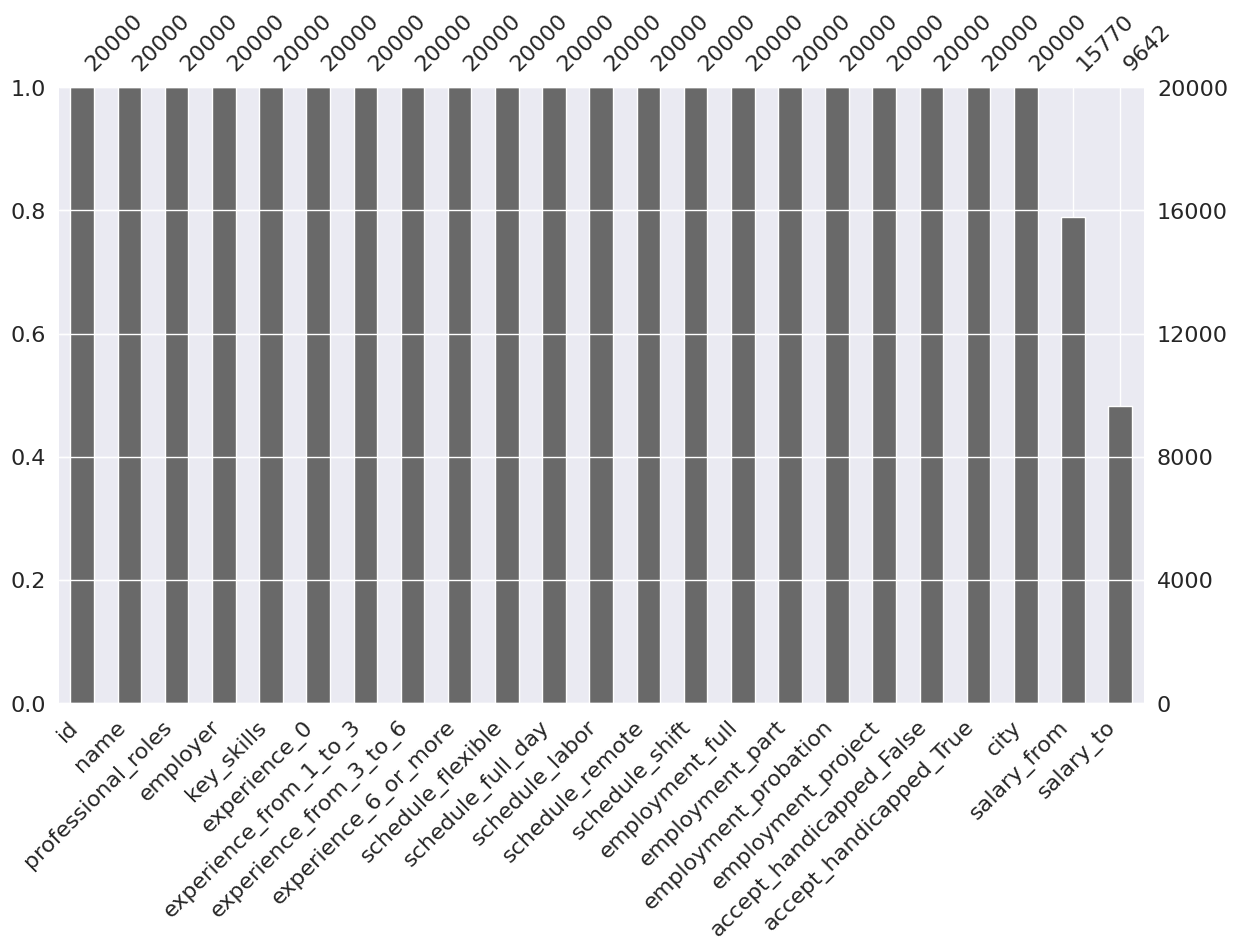

In [496]:
sns.set()
msno.bar(dataset, figsize=(14, 8))
plt.show()

Построим матрицу пропущенных значений

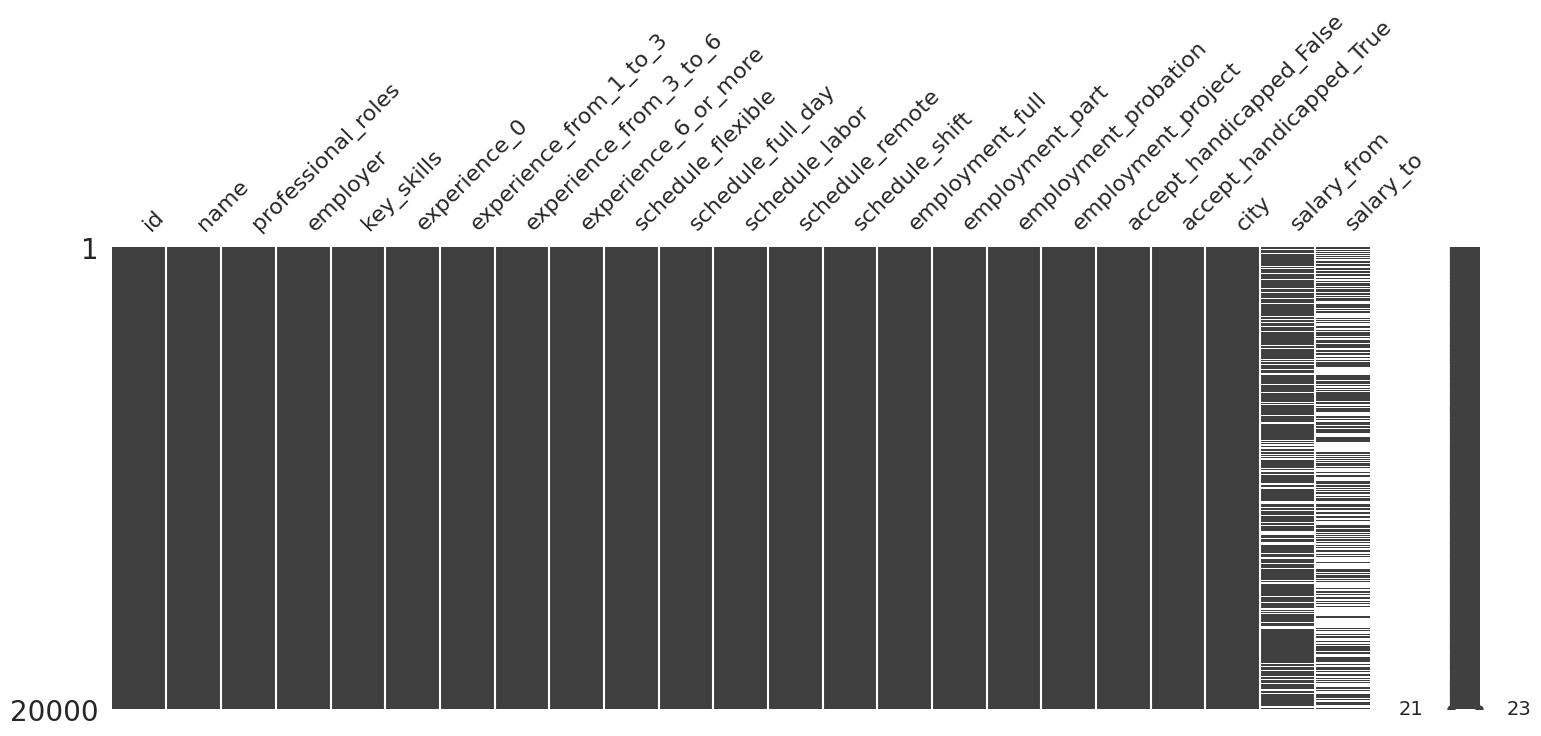

In [497]:
msno.matrix(dataset, figsize=(18, 6))
plt.show()

Построим матрицу корреляций пропущенных значений

In [498]:
dataset[[sign_1, sign_2]].isnull().corr()

,salary_from,salary_to
salary_from,1.000000,0.310525
salary_to,0.310525,1.000000


Отобразим матрицу корреляций

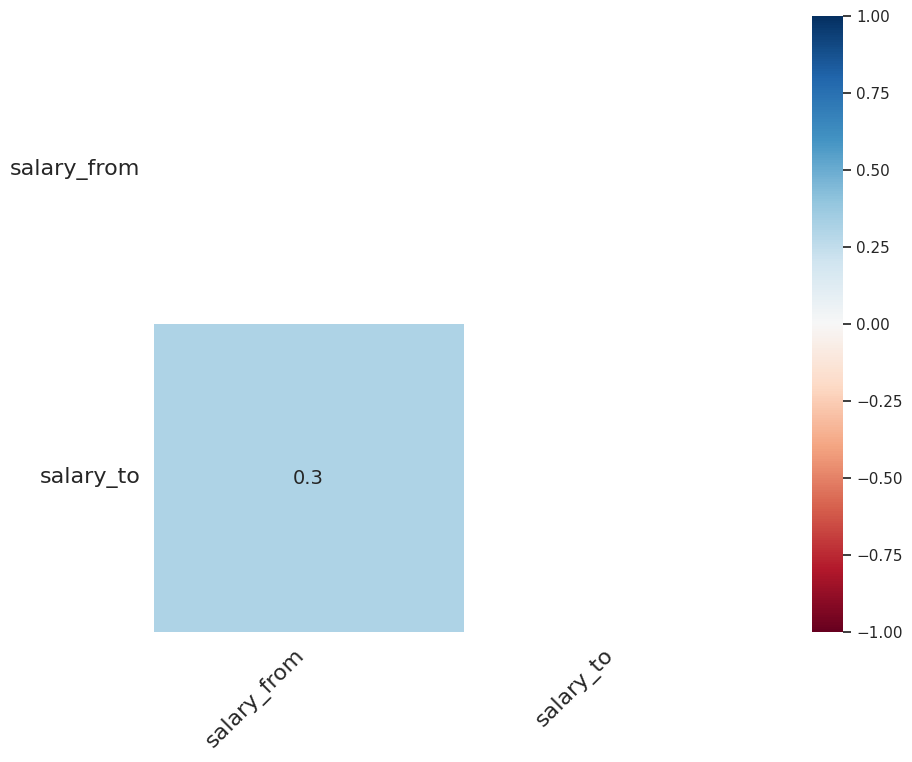

In [499]:
msno.heatmap(dataset[[sign_1, sign_2]], figsize=(10, 8))
plt.show()

Для каждой профессии найдём медианную, среднюю, минимальную, максимальную зарплаты и количество наблюдений по ней

In [500]:
statistics = dataset.groupby("professional_roles")[[sign_1, sign_2]].agg(['median', 'mean', 'min', 'max', 'count'])
statistics.head(30)

salary_from                 \
                                                        median           mean   
professional_roles                                                              
BI-аналитик, аналитик данных                           50000.0   69333.333333   
DevOps-инженер                                        300000.0       250000.0   
Event-менеджер                                         30000.0        30000.0   
PR-менеджер                                            35000.0   38181.818182   
SMM-менеджер, контент-менеджер                         26500.0   29791.666667   
Автомойщик                                             40000.0   43764.705882   
Автослесарь, автомеханик                               50000.0      64659.875   
Агент по недвижимости                                  52500.0   64209.677419   
Агроном                                                50000.0   55538.461538   
Администратор                                          27000.0   28156.253298   
Администратор магазина, администратор торгового...     37000.0   43227.134328   
Аналитик                                               44000.0   65945.652174   
Андеррайтер                                            41500.0        41500.0   
Арт-директор, креативный директор                      75000.0        78000.0   
Артист, актер, аниматор                                40000.0        37500.0   
Архитектор                                             60000.0        56360.0   
Ассистент врача                                        30000.0   29822.727273   
Аудитор                                                42500.0   41333.333333   
Бизнес-аналитик                                        30000.0        37280.0   
Бизнес-тренер                                          34500.0   41522.333333   
Брокер                                                 40000.0        40000.0   
Бухгалтер                                              35000.0    39819.38326   
Ветеринарный врач                                      52500.0        49170.0   
Видеооператор, видеомонтажер                           42500.0        41250.0   
Водитель                                               90000.0   84717.491543   
Военнослужащий                                         45000.0   43333.333333   
Воспитатель, няня                                      22000.0   22383.490566   
Врач                                                   59500.0   66284.263285   
Гейм-дизайнер                                          60000.0        60000.0   
Генеральный директор, исполнительный директор (...    120000.0  146363.636364   

                                                                          \
                                                       min     max count   
professional_roles                                                         
BI-аналитик, аналитик данных                         18000  140000     3   
DevOps-инженер                                      150000  300000     3   
Event-менеджер                                       20000   40000     4   
PR-менеджер                                          25000   70000    11   
SMM-менеджер, контент-менеджер                        5000   80000    48   
Автомойщик                                           16000  100000    34   
Автослесарь, автомеханик                             20000  220000   152   
Агент по недвижимости                                20000  200000    62   
Агроном                                              25000  100000    13   
Администратор                                           15  120000   379   
Администратор магазина, администратор торгового...   18000   80000    67   
Аналитик                                               500  300000    46   
Андеррайтер                                          40000   43000     2   
Арт-директор, креативный директор                    42000  120000     4   
Артист, актер, аниматор                              10000   60000     4   
Архитекто

Подготовим модели для заполнения пропусков по методу K-ближайших

In [501]:
def prepare_knn_imputer(dataset: pd.DataFrame, target_column: str, n_neighbors: int = 5) -> KNNImputer:
    """
    Обучает KNN-импутер для заполнения пропусков в указанном столбце
    :param dataset: Исходный датафрейм с данными
    :param target_column: Название столбца, для которого обучается импутер
    :param n_neighbors: Количество соседей для KNN
    :return: Обученный импутер для указанного столбца
    """
    known_values = dataset[dataset[target_column].notna()][[target_column]]  # Берём только известные значения
    known_values = known_values.values.reshape(-1, 1)  # Преобразуем в 2D-массив (требование KNNImputer)
    imputer = KNNImputer(n_neighbors=n_neighbors)  # Создаём импутер
    imputer.fit(known_values)  # Обучаем на известных данных

    return imputer

knn_imputer_sign_1 = prepare_knn_imputer(dataset, sign_1)  # Для признака 1
knn_imputer_sign_2 = prepare_knn_imputer(dataset, sign_2)  # Для признака 2

Проведем сравнительный анализ распределения, сравнив датасеты с пропусками, заполненными медианными и средними значениями, а также с исходным датасетом, содержащим пропуски.

In [502]:
# Создаем копии датасета для заполнения
dataset_by_median = dataset[['professional_roles', sign_1, sign_2]].copy()
dataset_by_mean = dataset[['professional_roles', sign_1, sign_2]].copy()

for role in dataset['professional_roles'].unique():
    # Маски для групп
    median_mask = dataset_by_median['professional_roles'] == role
    mean_mask = dataset_by_mean['professional_roles'] == role

    # Получение статистик из DataFrame statistics
    median_sign_1 = statistics.loc[role, (sign_1, 'median')] if role in statistics.index else np.nan
    median_sign_2 = statistics.loc[role, (sign_2, 'median')] if role in statistics.index else np.nan
    mean_sign_1 = statistics.loc[role, (sign_1, 'mean')] if role in statistics.index else np.nan
    mean_sign_2 = statistics.loc[role, (sign_2, 'mean')] if role in statistics.index else np.nan

    # Обработка для sign_1 (медиана)
    if pd.isna(median_sign_1):
        # Для KNN нужно передать 2D массив
        knn_value = knn_imputer_sign_1.transform([[np.nan]])[0][0]
        dataset_by_median.loc[median_mask, sign_1] = dataset_by_median.loc[median_mask, sign_1].fillna(int(knn_value))
    else:
        dataset_by_median.loc[median_mask, sign_1] = dataset_by_median.loc[median_mask, sign_1].fillna(int(median_sign_1))

    # Обработка для sign_2 (медиана)
    if pd.isna(median_sign_2):
        knn_value = knn_imputer_sign_2.transform([[np.nan]])[0][0]
        dataset_by_median.loc[median_mask, sign_2] = dataset_by_median.loc[median_mask, sign_2].fillna(int(knn_value))
    else:
        dataset_by_median.loc[median_mask, sign_2] = dataset_by_median.loc[median_mask, sign_2].fillna(int(median_sign_2))

    # Обработка для sign_1 (среднее)
    if pd.isna(mean_sign_1):
        knn_value = knn_imputer_sign_1.transform([[np.nan]])[0][0]
        dataset_by_mean.loc[mean_mask, sign_1] = dataset_by_mean.loc[mean_mask, sign_1].fillna(int(knn_value))
    else:
        dataset_by_mean.loc[mean_mask, sign_1] = dataset_by_mean.loc[mean_mask, sign_1].fillna(int(mean_sign_1))

    # Обработка для sign_2 (среднее)
    if pd.isna(mean_sign_2):
        knn_value = knn_imputer_sign_2.transform([[np.nan]])[0][0]
        dataset_by_mean.loc[mean_mask, sign_2] = dataset_by_mean.loc[mean_mask, sign_2].fillna(int(knn_value))
    else:
        dataset_by_mean.loc[mean_mask, sign_2] = dataset_by_mean.loc[mean_mask, sign_2].fillna(int(mean_sign_2))

Графический анализ по sign_1

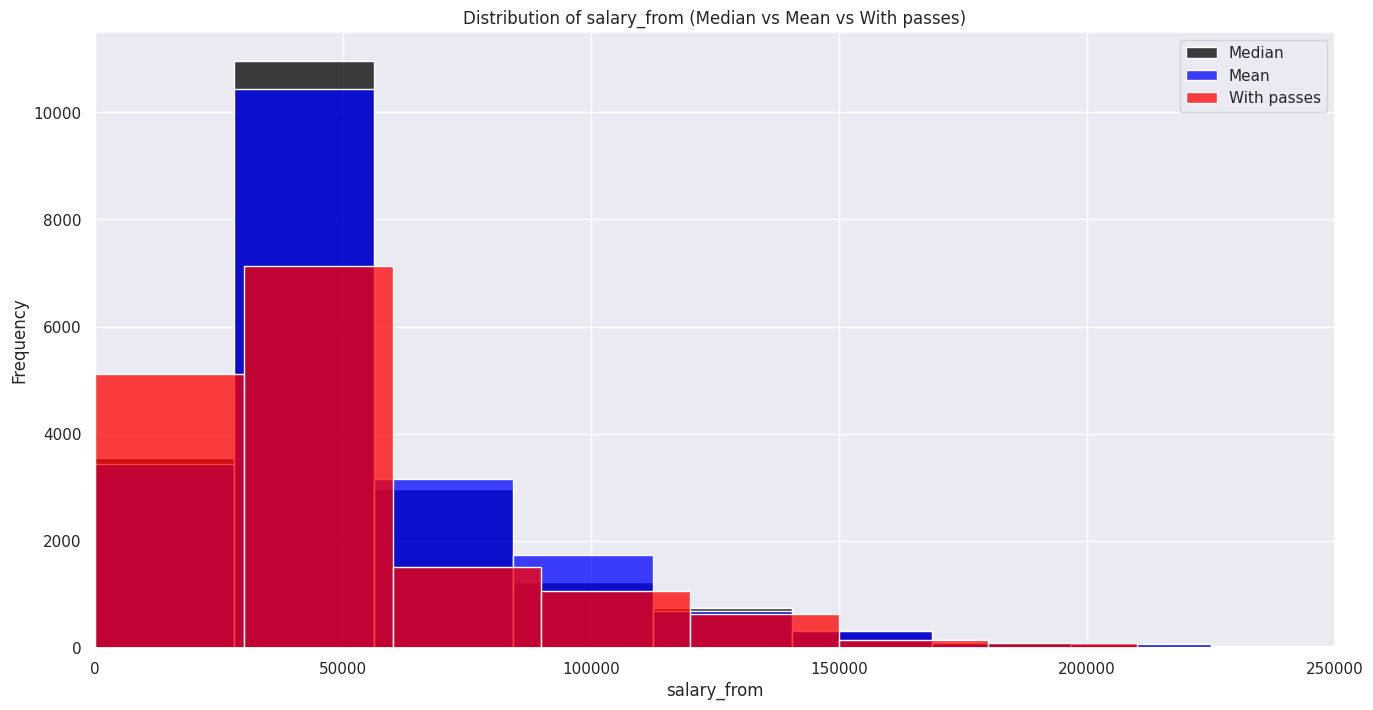

In [503]:
plt.figure(figsize=(16, 8))
sns.histplot(dataset_by_median[sign_1], bins='sturges', color='black', label='Median', kde=False)
sns.histplot(dataset_by_mean[sign_1], bins='sturges', color='blue', label='Mean', kde=False)
sns.histplot(dataset[sign_1], bins='sturges', color='red', label='With passes', kde=False)
plt.xlim(0, 250000)
plt.xlabel(sign_1)
plt.ylabel('Frequency')
plt.title('Distribution of ' + sign_1 + ' (Median vs Mean vs With passes)')
plt.legend()
plt.show()

Графический анализ по sign_2

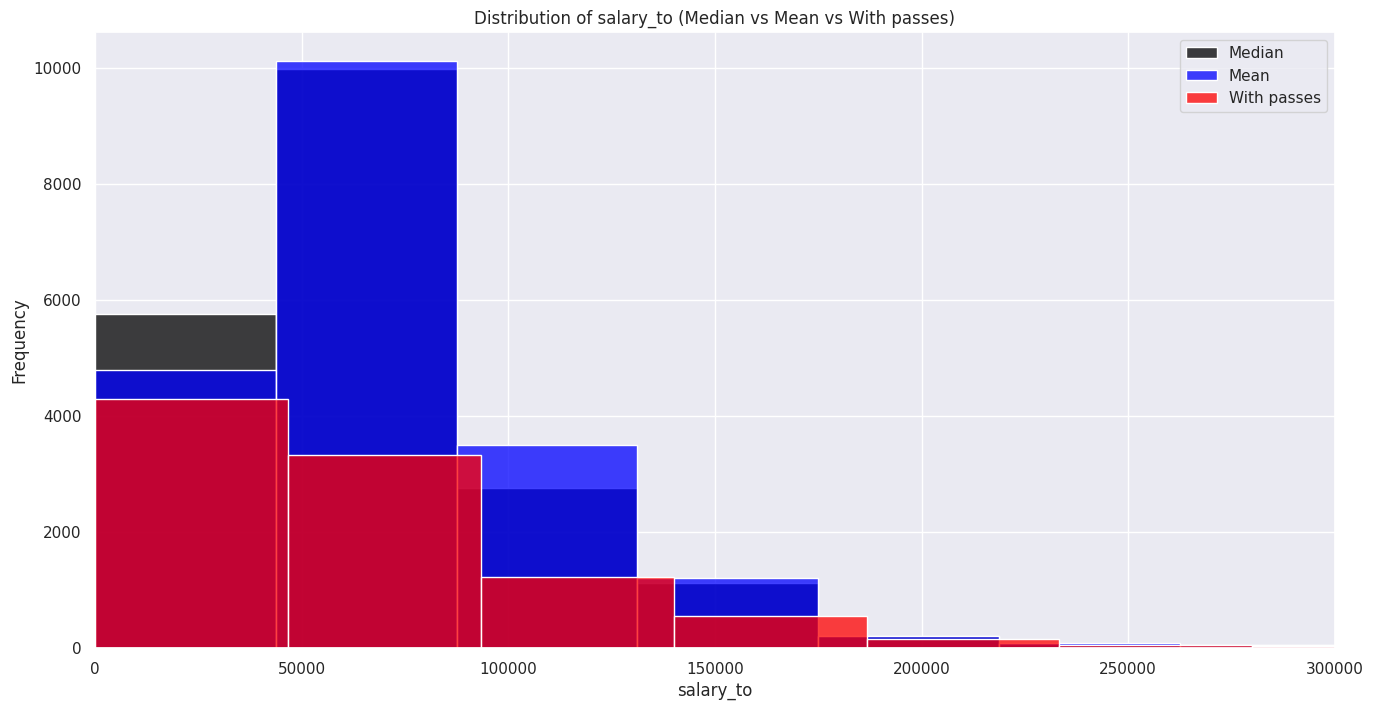

In [504]:
plt.figure(figsize=(16, 8))
sns.histplot(dataset_by_median[sign_2], bins='sturges', color='black', label='Median', kde=False)
sns.histplot(dataset_by_mean[sign_2], bins='sturges', color='blue', label='Mean', kde=False)
sns.histplot(dataset[sign_2], bins='sturges', color='red', label='With passes', kde=False)
plt.xlim(0, 300000)
plt.xlabel(sign_2)
plt.ylabel('Frequency')
plt.title('Distribution of ' + sign_2 + ' (Median vs Mean vs With passes)')
plt.legend()
plt.show()

Заполним с помощью среднего пропуски по минимальной ЗП и максимальной ЗП

In [505]:
dataset[[sign_1, sign_2]] = dataset_by_mean[[sign_1, sign_2]].copy()

Посмотрим нет ли наблюдений в которых минимальная зарплата больше, чем максимальная

In [506]:
dataset[dataset[sign_1] > dataset[sign_2]][[sign_1, sign_2]]

,salary_from,salary_to
24,90000,55500
32,105000,61413
44,48094,23000
57,50000,46178
77,92000,88672
...,...,...
19908,60000,52785
19914,55000,53730
19986,100000,73482
19991,70000,61413


Поменяем местами, если есть такие строки

In [507]:
mask = dataset[sign_1] > dataset[sign_2]
dataset.loc[mask, [sign_1, sign_2]] = dataset.loc[mask, [sign_2, sign_1]].values

Проверим нет ли теперь наблюдений в которых минимальная зарплата больше, чем максимальная

In [508]:
dataset[dataset[sign_1] > dataset[sign_2]][[sign_1, sign_2]]

,salary_from,salary_to


Посмотрим информацию о датасете

In [509]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        20000 non-null  int64   
 1   name                      20000 non-null  string  
 2   professional_roles        20000 non-null  string  
 3   employer                  20000 non-null  string  
 4   key_skills                20000 non-null  object  
 5   experience_0              20000 non-null  category
 6   experience_from_1_to_3    20000 non-null  category
 7   experience_from_3_to_6    20000 non-null  category
 8   experience_6_or_more      20000 non-null  category
 9   schedule_flexible         20000 non-null  category
 10  schedule_full_day         20000 non-null  category
 11  schedule_labor            20000 non-null  category
 12  schedule_remote           20000 non-null  category
 13  schedule_shift            20000 non-null  cate

Удалим ненужные переменные

In [510]:
del dataset_by_mean
del dataset_by_median
del statistics
del knn_imputer_sign_1
del knn_imputer_sign_2
del mask

**Выводы по обработке признака**:

  * В признаках salary_from и salary_to обнаружены пропущенные значения

  * Матрица пропущенных значений и тепловая карта корреляции показали, что пропуски в этих признаках могут быть слабо связаны между собой

  * Для каждой профессии (professional_roles) были рассчитаны медианные, средние, минимальные, максимальные значения и количество наблюдений

  * Это позволило заполнить пропуски на основе групповых статистик, что является более точным, чем общее среднее или медиана по всему датасету

  * KNN Imputer: Для профессий, по которым не было достаточных данных, применялся метод ближайших соседей

  * Обнаружены и исправлены строки, где salary_from (минимальная зарплата) была больше salary_to (максимальной зарплаты). В таких случаях значения были поменяны местами

  * После обработки аномальных строк не осталось
